In [1]:
# import pandas as pd

# # Load and inspect the dataset to confirm if it matches the provided description.
# file_path = r"C:\Users\HP\Documents\data mining\backtest-template-v2 (9).csv"
# data = pd.read_csv(file_path)

# # Display basic info and the first few rows to understand its structure and confirm columns
# data_info = data.info()
# data_head = data.head()

# data_info, data_head


In [2]:
# # Split the single column into multiple columns based on the delimiter ";"
# data_split = data["Pair;Action;Tanggal Entry;Tanggal Exit;Entry;TP;SL;Keterangan"].str.split(";", expand=True)

# # Rename columns based on the expected structure
# data_split.columns = ["Pair", "Action", "Tanggal Entry", "Tanggal Exit", "Entry", "TP", "SL", "Keterangan"]

# # Display basic info and the first few rows to confirm the structure
# data_split_info = data_split.info()
# data_split_head = data_split.head()

# data_split_info, data_split_head


In [3]:
# # Convert necessary columns to numeric data types and dates for time series modeling
# # Convert 'Entry', 'TP', 'SL' to floats and 'Tanggal Entry' and 'Tanggal Exit' to datetime
# data_split['Entry'] = pd.to_numeric(data_split['Entry'], errors='coerce')
# data_split['TP'] = pd.to_numeric(data_split['TP'], errors='coerce')
# data_split['SL'] = pd.to_numeric(data_split['SL'], errors='coerce')
# data_split['Tanggal Entry'] = pd.to_datetime(data_split['Tanggal Entry'], errors='coerce')
# data_split['Tanggal Exit'] = pd.to_datetime(data_split['Tanggal Exit'], errors='coerce')

# # Drop any rows with NaN values that couldn't be converted, if any
# data_cleaned = data_split.dropna()

# # Display basic info and the first few rows of cleaned data for verification
# data_cleaned_info = data_cleaned.info()
# data_cleaned_head = data_cleaned.head()

# data_cleaned_info, data_cleaned_head


In [4]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# from tensorflow.keras.callbacks import EarlyStopping

# # Select the features and target variable for prediction
# # Using "Entry" as the target variable and time-related features for forecasting

# # Extracting only 'Entry' values as the target for both models
# entry_values = data_cleaned[['Entry']].values

# # Setting up time series generator for LSTM model
# n_input = 10  # Number of previous steps to consider in predicting the next step
# n_features = 1
# generator = TimeseriesGenerator(entry_values, entry_values, length=n_input, batch_size=1)

# # Split dataset for Random Forest
# X_rf = np.array([entry_values[i - n_input:i, 0] for i in range(n_input, len(entry_values))])
# y_rf = entry_values[n_input:, 0]
# X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# # Model 1: Random Forest Regressor
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train_rf, y_train_rf)
# y_pred_rf = rf_model.predict(X_test_rf)
# rf_mse = mean_squared_error(y_test_rf, y_pred_rf)

# # Model 2: LSTM
# lstm_model = Sequential([
#     LSTM(100, activation='relu', input_shape=(n_input, n_features)),
#     Dropout(0.2),
#     Dense(1)
# ])
# lstm_model.compile(optimizer='adam', loss='mse')
# early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# # Train the LSTM model
# lstm_model.fit(generator, epochs=20, callbacks=[early_stopping], verbose=0)

# # Evaluate LSTM model
# test_generator = TimeseriesGenerator(entry_values, entry_values, length=n_input, batch_size=1)
# y_pred_lstm = lstm_model.predict(test_generator)
# y_pred_lstm_flat = y_pred_lstm.flatten()[-len(y_rf):]  # Flattening and aligning for comparison
# lstm_mse = mean_squared_error(y_rf, y_pred_lstm_flat)

# rf_mse, lstm_mse


In [5]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Set window (jumlah langkah waktu yang digunakan untuk memprediksi langkah berikutnya)
# n_input = 10  # Sesuaikan sesuai kebutuhan

# # Menyiapkan dataset untuk Random Forest
# X_rf = np.array([entry_values[i - n_input:i, 0] for i in range(n_input, len(entry_values))])
# y_rf = entry_values[n_input:, 0]

# # Membagi data menjadi data latih dan uji
# X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# # Melatih model Random Forest
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train_rf, y_train_rf)

# # Evaluasi model Random Forest
# y_pred_rf = rf_model.predict(X_test_rf)
# rf_mse = mean_squared_error(y_test_rf, y_pred_rf)
# print(f"Random Forest MSE: {rf_mse}")


In [6]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# from tensorflow.keras.callbacks import EarlyStopping

# # Membuat generator deret waktu untuk LSTM
# n_features = 1  # Hanya menggunakan satu fitur (Entry)
# generator = TimeseriesGenerator(entry_values, entry_values, length=n_input, batch_size=1)

# # Membuat dan melatih model LSTM
# lstm_model = Sequential([
#     LSTM(100, activation='relu', input_shape=(n_input, n_features)),
#     Dropout(0.2),
#     Dense(1)
# ])

# lstm_model.compile(optimizer='adam', loss='mse')
# early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# # Melatih model LSTM
# lstm_model.fit(generator, epochs=20, callbacks=[early_stopping], verbose=1)

# # Evaluasi model LSTM
# test_generator = TimeseriesGenerator(entry_values, entry_values, length=n_input, batch_size=1)
# y_pred_lstm = lstm_model.predict(test_generator)
# y_pred_lstm_flat = y_pred_lstm.flatten()[-len(y_rf):]  # Menyelaraskan data prediksi untuk perbandingan
# lstm_mse = mean_squared_error(y_rf, y_pred_lstm_flat)
# print(f"LSTM MSE: {lstm_mse}")


c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


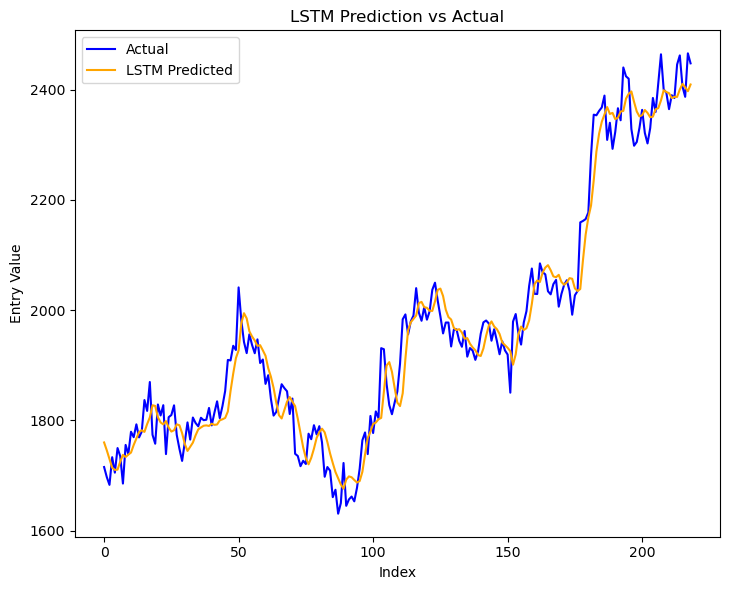

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = r"C:\Users\HP\Documents\data mining\backtest-template-v2 (9).csv"
data = pd.read_csv(file_path, delimiter=';')

# Rename columns based on structure
data.columns = ["Pair", "Action", "Tanggal Entry", "Tanggal Exit", "Entry", "TP", "SL", "Keterangan"]

# Convert necessary columns to appropriate types
data['Entry'] = pd.to_numeric(data['Entry'], errors='coerce')
data['TP'] = pd.to_numeric(data['TP'], errors='coerce')
data['SL'] = pd.to_numeric(data['SL'], errors='coerce')
data['Tanggal Entry'] = pd.to_datetime(data['Tanggal Entry'], errors='coerce')
data['Tanggal Exit'] = pd.to_datetime(data['Tanggal Exit'], errors='coerce')

# Drop rows with NaN values
data_cleaned = data.dropna()

# Extract 'Entry' as the target variable
entry_values = data_cleaned[['Entry']].values

# 1. **Normalize the 'Entry' values**
scaler = MinMaxScaler()
entry_values_normalized = scaler.fit_transform(entry_values)

# Parameters for time series
n_input = 10
n_features = 1

# Prepare data for Random Forest
X_rf = np.array([entry_values_normalized[i - n_input:i, 0] for i in range(n_input, len(entry_values_normalized))])
y_rf = entry_values_normalized[n_input:, 0]
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# 2. **Train the updated Random Forest model**
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_model.predict(X_test_rf)

# Set up time series generator for LSTM
generator = TimeseriesGenerator(entry_values_normalized, entry_values_normalized, length=n_input, batch_size=1)

# Create test generator for validation data (same format as generator)
test_generator = TimeseriesGenerator(entry_values_normalized, entry_values_normalized, length=n_input, batch_size=1)

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)



# 3. **Train the updated LSTM model with modified parameters**
lstm_model = Sequential([
    LSTM(200, activation='relu', input_shape=(n_input, n_features), return_sequences=True),
    Dropout(0.3),
    LSTM(150, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(100, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(generator, epochs=100, validation_data=test_generator, callbacks=[early_stopping], verbose=0)

# Predict with LSTM
y_pred_lstm = lstm_model.predict(test_generator).flatten()

# 4. **Rescale predictions back to original scale**
y_pred_rf_rescaled = scaler.inverse_transform(y_pred_rf.reshape(-1, 1)).flatten()
y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm.reshape(-1, 1)).flatten()
y_test_rf_rescaled = scaler.inverse_transform(y_test_rf.reshape(-1, 1)).flatten()
y_rf_rescaled = scaler.inverse_transform(y_rf.reshape(-1, 1)).flatten()

from sklearn.metrics import mean_absolute_error
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mae_lstm = mean_absolute_error(y_rf, y_pred_lstm)

# Plotting code
plt.figure(figsize=(14, 6))
# Plot Random Forest predictions
# plt.subplot(1, 2, 1)
# plt.plot(y_test_rf_rescaled, label='Actual', color='blue')
# plt.plot(y_pred_rf_rescaled, label='Random Forest Predicted', color='green')
# plt.title("Random Forest Prediction vs Actual")
# plt.xlabel("Index")
# plt.ylabel("Entry Value")
# plt.legend()
# print("MAE Random Forest:", mae_rf)
# print("MAE LSTM:", mae_lstm)
# Plot LSTM predictions
plt.subplot(1, 2, 2)
plt.plot(y_rf_rescaled, label='Actual', color='blue')
plt.plot(y_pred_lstm_rescaled, label='LSTM Predicted', color='orange')
plt.title("LSTM Prediction vs Actual")
plt.xlabel("Index")
plt.ylabel("Entry Value")
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt

# # Load and preprocess the data
# def load_and_preprocess_data(file_path):
#     # Read the CSV file
#     data = pd.read_csv(file_path, sep=';')
    
#     # Convert date columns to datetime
#     data['Tanggal Entry'] = pd.to_datetime(data['Tanggal Entry'], format='%d-%b-%Y')
#     data['Tanggal Exit'] = pd.to_datetime(data['Tanggal Exit'], format='%d-%b-%Y')
    
#     # Convert price columns to float
#     data['Entry'] = pd.to_numeric(data['Entry'], errors='coerce')
#     data['TP'] = pd.to_numeric(data['TP'], errors='coerce')
#     data['SL'] = pd.to_numeric(data['SL'], errors='coerce')
    
#     # Sort by entry date
#     data = data.sort_values('Tanggal Entry')
    
#     # Calculate additional features
#     data['Price_Change'] = data['Entry'].diff()
#     data['Target'] = data['Entry'].shift(-1)  # Next day's price as target
    
#     return data

# # Prepare data for LSTM
# def prepare_lstm_data(data, lookback=10):
#     scaler = MinMaxScaler()
#     scaled_data = scaler.fit_transform(data[['Entry']])
    
#     X, y = [], []
#     for i in range(len(scaled_data) - lookback):
#         X.append(scaled_data[i:i+lookback])
#         y.append(scaled_data[i+lookback])
    
#     X = np.array(X)
#     y = np.array(y)
    
#     return X, y, scaler

# # Build and train LSTM model
# def build_lstm_model(X_train, y_train, X_test, y_test):
#     model = Sequential([
#         LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
#         Dropout(0.2),
#         LSTM(50, activation='relu'),
#         Dropout(0.2),
#         Dense(1)
#     ])
    
#     model.compile(optimizer='adam', loss='mse')
#     early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
#     history = model.fit(
#         X_train, y_train,
#         epochs=100,
#         batch_size=32,
#         validation_split=0.1,
#         callbacks=[early_stopping],
#         verbose=1
#     )
    
#     return model, history

# # Build and train Random Forest model
# def build_rf_model(X_train, y_train):
#     model = RandomForestRegressor(
#         n_estimators=200,
#         max_depth=20,
#         min_samples_split=5,
#         min_samples_leaf=2,
#         random_state=42
#     )
#     model.fit(X_train, y_train)
#     return model

# # Evaluate models
# def evaluate_model(y_true, y_pred, model_name):
#     mse = mean_squared_error(y_true, y_pred)
#     mae = mean_absolute_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)
    
#     print(f"\n{model_name} Performance Metrics:")
#     print(f"MSE: {mse:.4f}")
#     print(f"MAE: {mae:.4f}")
#     print(f"R2 Score: {r2:.4f}")
#     return mse, mae, r2

# # Plot predictions
# def plot_predictions(actual, lstm_pred, rf_pred, title):
#     plt.figure(figsize=(12, 6))
#     plt.plot(actual, label='Actual', color='blue')
#     plt.plot(lstm_pred, label='LSTM Predictions', color='red')
#     plt.plot(rf_pred, label='RF Predictions', color='green')
#     plt.title(title)
#     plt.xlabel('Time')
#     plt.ylabel('Price')
#     plt.legend()
#     plt.show()

# # Main execution
# def main():
#     # Load and preprocess data
#     file_path = r"C:\Users\HP\Documents\data mining\backtest-template-v2 (9).csv"
#     data = load_and_preprocess_data(file_path)
    
#     # Prepare features for both models
#     lookback = 10
#     X_lstm, y_lstm, scaler = prepare_lstm_data(data, lookback)
    
#     # Split the data
#     split_idx = int(len(X_lstm) * 0.8)
#     X_train_lstm, X_test_lstm = X_lstm[:split_idx], X_lstm[split_idx:]
#     y_train_lstm, y_test_lstm = y_lstm[:split_idx], y_lstm[split_idx:]
    
#     # Prepare data for Random Forest
#     X_rf = X_lstm.reshape(X_lstm.shape[0], -1)  # Flatten the sequences
#     X_train_rf, X_test_rf = X_rf[:split_idx], X_rf[split_idx:]
#     y_train_rf = y_train_lstm.reshape(-1)
#     y_test_rf = y_test_lstm.reshape(-1)
    
#     # Train LSTM model
#     lstm_model, history = build_lstm_model(X_train_lstm, y_train_lstm, X_test_lstm, y_test_lstm)
    
#     # Train Random Forest model
#     rf_model = build_rf_model(X_train_rf, y_train_rf)
    
#     # Make predictions
#     lstm_pred = lstm_model.predict(X_test_lstm)
#     rf_pred = rf_model.predict(X_test_rf)
    
#     # Inverse transform predictions
#     lstm_pred = scaler.inverse_transform(lstm_pred)
#     rf_pred = scaler.inverse_transform(rf_pred.reshape(-1, 1))
#     y_test_actual = scaler.inverse_transform(y_test_lstm)
    
#     # Evaluate models
#     lstm_metrics = evaluate_model(y_test_actual, lstm_pred, "LSTM")
#     rf_metrics = evaluate_model(y_test_actual, rf_pred, "Random Forest")
    
#     # Plot results
#     plot_predictions(y_test_actual, lstm_pred, rf_pred, "XAUUSD Price Predictions")
    
#     return lstm_model, rf_model, lstm_metrics, rf_metrics

# if __name__ == "__main__":
#     lstm_model, rf_model, lstm_metrics, rf_metrics = main()